# Quick in-between analysis of Pancreas carcinomas for Olivia

In [11]:
%matplotlib inline

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os

import pickle
# from collections import defaultdict

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from src import ovrlp


In [300]:
data_path = '../../pancreas/pancreas7.pkl'

# load data from pickled file:

with open(data_path, 'rb') as f:
    data = pickle.load(f)

df = pd.DataFrame(columns=['x','y','gene'])


for i,gene in enumerate(data[0]):

    df_ = pd.DataFrame(columns=['x','y','gene'])
    df_['x'] = data[1][i][:,0]*0.33
    df_['y'] = data[1][i][:,1]*0.33
    df_['gene'] = gene

    df = pd.concat([df,df_])


df = df.reset_index()
df.gene = df.gene.astype('category')
genes = df.gene.cat.categories

df.drop('index',axis=1,inplace=True)

ovrlp.assign_xy(df)


,x,y,gene,x_pixel,y_pixel,n_pixel
0,1597.612418,580.738703,ABCC8,1597,580,1264837
1,867.984233,668.606483,ABCC8,867,668,1455771
2,1056.804292,776.624393,ABCC8,1056,776,1691184
3,1070.722125,790.679505,ABCC8,1070,790,1721690
4,1030.312470,838.894815,ABCC8,1030,838,1826194
...,...,...,...,...,...,...
168466,1488.242085,2908.706130,ZNF385D,1488,2908,6335112
168467,1383.588608,2917.209983,ZNF385D,1383,2917,6354609
168468,1556.032665,2845.403963,ZNF385D,1556,2845,6197966
168469,1190.818530,3135.410107,ZNF385D,1190,3135,6829220


Text(0.5, 1.0, '10263')

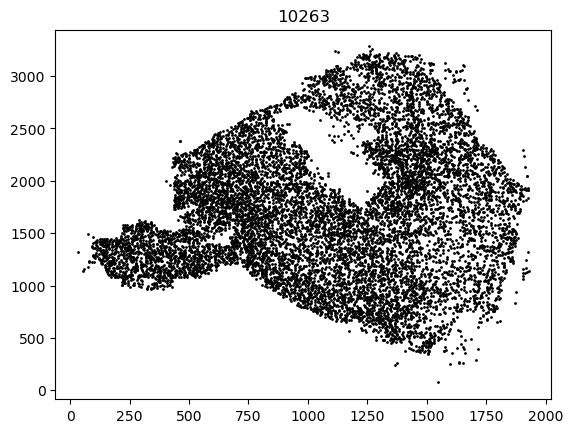

In [301]:

rois_celltyping_x,rois_celltyping_y = ovrlp.get_rois(df, genes = df.gene.cat.categories, min_distance=3,
                        KDE_bandwidth=2.9, min_expression=0.05)

plt.figure()
plt.scatter(rois_celltyping_x,rois_celltyping_y, s=1, c='k')
plt.title(len(rois_celltyping_x))

In [302]:
localmax_celltyping_samples =  ovrlp.get_expression_vectors_at_rois(df, rois_celltyping_x, rois_celltyping_y, genes = df.gene.cat.categories,
                        KDE_bandwidth=2.9, min_expression=0.0)
    
localmax_celltyping_samples

,2872814,2485151,2522183,2554868,3251829,2692086,2661595,2979595,2670320,3005733,...,4168431,2452173,4451577,4453756,4005089,2881242,4214178,4164085,4161908,2476137
ABCC8,0.0,0.0,0.010443,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
ACTA2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
ADIRF,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00649,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.008737,0.0,0.0,0.000000,0.000000,0.0
AMY2A,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
ANXA4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VCAN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
VPREB3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
VWF,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
ZEB2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.004281,0.008737,0.0


In [303]:

import umap


dr = ovrlp.dim_reduction(n_components=30)
factors = dr.fit_transform(localmax_celltyping_samples.T)

embedder_2d = ovrlp.umap.UMAP(n_components=2,min_dist=0.01)
embedding = embedder_2d.fit_transform(factors)

embedder_3d = umap.UMAP(n_components=3, min_dist=0.0,n_neighbors=10,)
                # init=np.concatenate([embedding,0.1*np.random.normal(size=(embedding.shape[0],1),scale=0.1)],axis=1))
embedding_color = embedder_3d.fit_transform(factors)

embedding_color,color_pca = ovrlp.fill_color_axes(embedding_color)

color_min = embedding_color.min(0)
color_max = embedding_color.max(0)

colors = ovrlp.min_to_max(embedding_color.copy())

In [304]:
signature_matrix = pd.DataFrame(index=genes,columns=genes).astype(float)
signature_matrix[:] = np.eye(len(genes))

celltype_class_assignments = ovrlp.determine_celltype_class_assignments(localmax_celltyping_samples,signature_matrix)
celltype_centers = np.array([np.median(embedding[celltype_class_assignments==i,:],axis=0) for i in range(len(genes))])


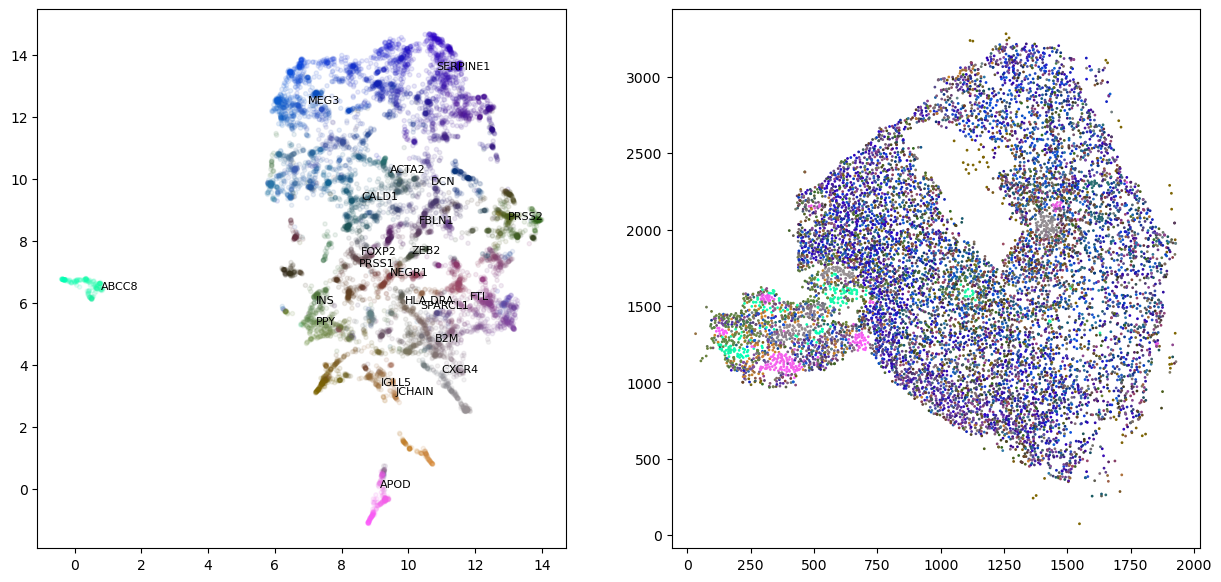

In [305]:

plt.figure(figsize=(15,7))

count_mask  = (df.gene.value_counts()>1900)[genes]

plt.subplot(1,2,1)
ovrlp.plot_embeddings(embedding,colors,celltype_centers[count_mask],count_mask.index[count_mask.values])

plt.subplot(1,2,2)
plt.scatter(rois_celltyping_x,rois_celltyping_y,s=1,c=colors)
